# Mini Project Fundamentals 47  
###### 온라인 코어 2기 박수경

## 1. 데이터 불러오기 및 확인

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA #아리마 모델
import pmdarima as pm #오토 아리마

필요한 라이브러리와 데이터를 불러옵니다. 

In [37]:
ap = pd.read_csv('AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

In [38]:
ap.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


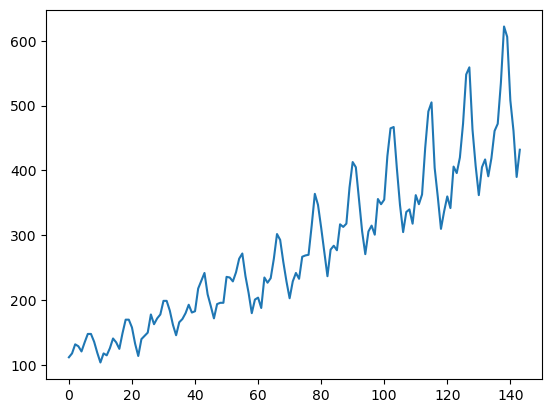

In [39]:
plt.plot(ap)
plt.show()

## 2. 분산을 일정하게 만들기 - log transformation

In [40]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)

In [41]:
ap_transformed.head(2)

,#Passengers
0,4.718499
1,4.770685


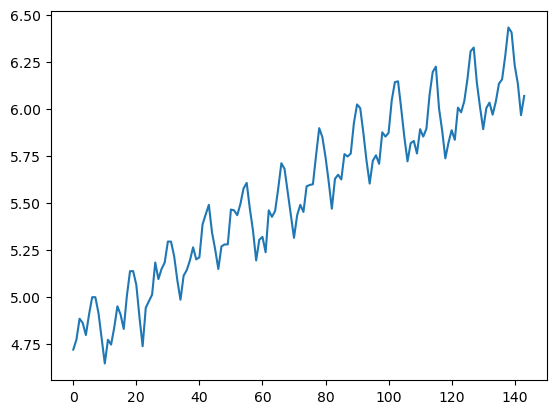

In [42]:
plt.plot(ap_transformed)
plt.show()

[]

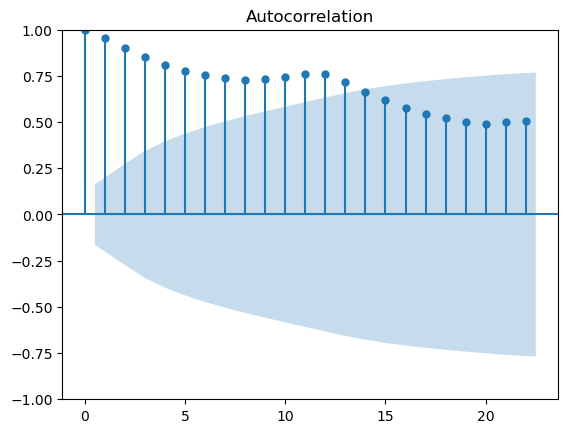

In [43]:
plot_acf(ap_transformed) #acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot()

## 3. 차분 분석

In [44]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

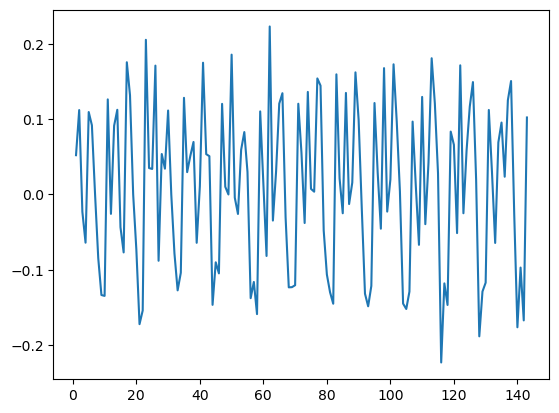

In [45]:
plt.plot(ap_diff)
plt.show()

차분을 통해 조금 더 정상적(stationary)인 형태로 변했다. 추세를 제거한 그래프이다. 추세를 제거한 그래프에서는 계절성을 확인할 수 있었는데 위의 ACF 그래프를 조금 더 자세히 살펴보면 다음과 같다.

![](output1.png)  

일반적으로 p,q는 간결의 원칙에 따라, 2 이하의 수로 선택하는 것이 이상적이다. 모형 개수가 증가하면 예측 모형이 복잡해질 뿐 아니라 추정의 정확도도 떨어진다. 모수의 개수가 적은 모형이 좋다.  



In [46]:
seasonally_diffed = ap_diff.diff(12)

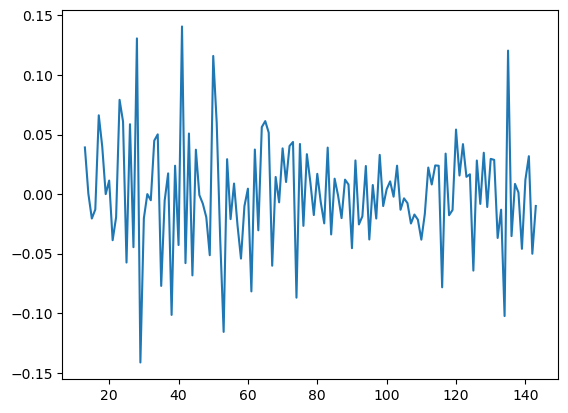

In [47]:
plt.plot(seasonally_diffed)
plt.show()

c:\Users\TAN\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

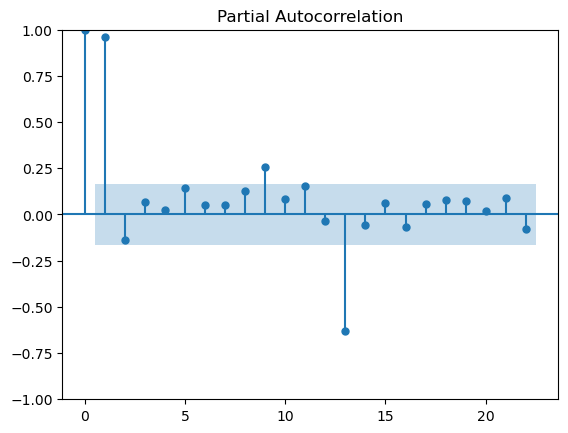

In [48]:
plot_pacf(ap_transformed) #lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plt.plot()

pacf : ar 차수! -> 1 , 즉 p=1 로 설정 ()

acf와 pacf에서 n = 12쯤 유의미한 상관관계가 나타남. 이는 전에 보았던 계절성 성분인 듯 함
auto-arima를 적합할 때 계절성을 고려하도록 해야 함
ARIMA를 적합할 때 계절성 요인도 고려해야 함




In [49]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [50]:
ap_transformed.head(2)

,#Passengers
0,4.718499
1,4.770685


In [51]:
train_size = int(len(ap_transformed)*0.8) #train-test split을 수동으로 하는 과정.

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

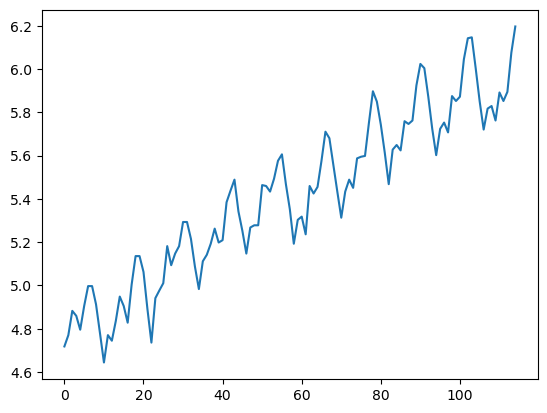

In [52]:
plt.plot(ap_transformed_train);

## 4. Auto ARIMA 적용

In [53]:
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) #seasonal = True 체크, # 계절차분(D) = 12
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-196.569, Time=0.04 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.257 seconds


가장 최적화된 아리마의 계수를 ARIMA (0,1,2)(0,0,0)[0]로 판단했다. 

In [54]:
#confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 
# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
115    6.180102
116    6.146166
117    6.158183
118    6.170200
119    6.182216
120    6.194233
121    6.206249
122    6.218266
123    6.230283
124    6.242299
125    6.254316
126    6.266332
127    6.278349
128    6.290365
129    6.302382
130    6.314399
131    6.326415
132    6.338432
133    6.350448
134    6.362465
135    6.374482
136    6.386498
137    6.398515
138    6.410531
139    6.422548
140    6.434565
141    6.446581
142    6.458598
143    6.470614
dtype: float64
--------------------------------------------------------------------------------
[[5.987363   6.37284141]
 [5.85107429 6.44125836]
 [5.82729679 6.48906906]
 [5.8070302  6.53336884]
 [5.78940792 6.57502432]
 [5.77387024 6.61459518]
 [5.76003083 6.65246779]
 [5.74760971 6.6889221 ]
 [5.7363963  6.7241

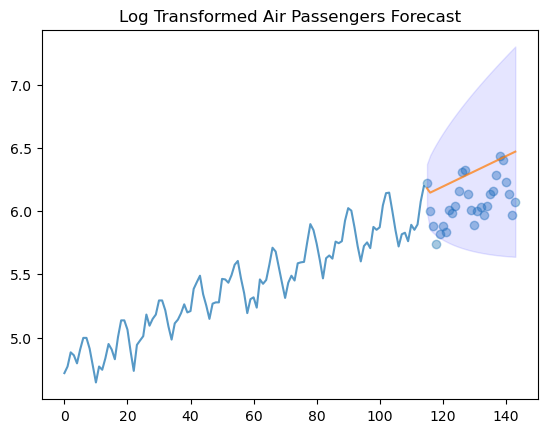

In [63]:
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1, 여기의 알파값은?
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() 

성능을 시각화해보았다. 음영으로 칠해진 부분이 설정한 유의 수준 내의 범위, 그리고 원래 가지고 있던 정답 데이터를 산점도 그래프로 표시했고 예측한 모델은 주황색 선 그래프이다.

## 5. ARCH 모델 실습해보기

In [56]:
# ⑦-1 : 데이터 및 라이브러리 불러오기
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다.
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) #start date
en = dt.datetime(2022, 1, 1) #end date
data = arch.data.sp500.load() #s&p 500 데이터 불러오기


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 1999-01-04 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5031 non-null   float64
 1   High       5031 non-null   float64
 2   Low        5031 non-null   float64
 3   Close      5031 non-null   float64
 4   Adj Close  5031 non-null   float64
 5   Volume     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [58]:
data["Adj Close"] #adjusted close 수정 종가

Date
1999-01-04    1228.099976
1999-01-05    1244.780029
1999-01-06    1272.339966
1999-01-07    1269.729980
1999-01-08    1275.089966
                 ...     
2018-12-24    2351.100098
2018-12-26    2467.699951
2018-12-27    2488.830078
2018-12-28    2485.739990
2018-12-31    2506.850098
Name: Adj Close, Length: 5031, dtype: float64

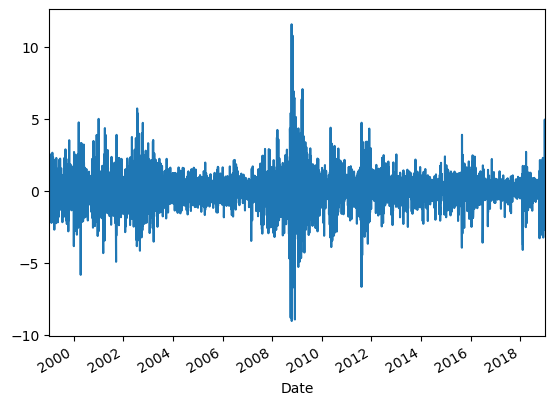

In [59]:
market = data["Adj Close"] #종가만 활용
returns = 100 * market.pct_change().dropna() #return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

pct_change는한 객체 내의 행과 행 차이를 현재값과의 백분율로 출력하는 메서드이다. (다음행 - 현재행) ÷ 현재행. (참고 : https://wikidocs.net/157039)

In [60]:
from arch import arch_model #ARCH 모델 적용

am = arch_model(returns) #return을 arch모델에 적합
res = am.fit(update_freq=5)
print(res.summary())# 지표를 통한 결과 확인
#다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
#아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 99%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Jan 04 2023   Df Residuals:                     5029
Time:         

AIC(Akaike Information Criterion) =  -2Log(Likelihood) + 2p : AIC의 식을 보면 모델의 파라미터(베타) 추정 방식이 MLE일 경우, 최대화된 Log-Likelihood 변수 추가에 따른 패널티 항(p)을 추가했다.  

BIC(Bayes Information Criterion) = -2Log(Likelihood) + log(n)p : AIC와 유사하지만 마지막 패널티를 수정함으로써 AIC를 보완했다. BIC의 경우 변수가 많을 수록 AIC보다 더 큰 페널티를 준다. 즉, AIC 보다 변수 증가에 더 민감하기 때문에 변수 갯수가 작은 것이 우선 순위라면 AIC보다 BIC를 참고하는게 좋다.  

(참고:https://rk1993.tistory.com/entry/AIC-BIC-Mallows-Cp-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0)

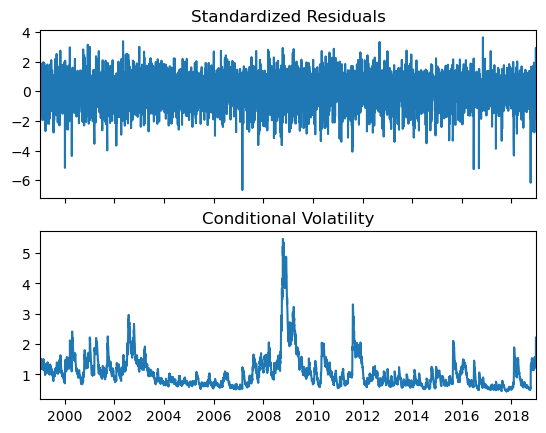

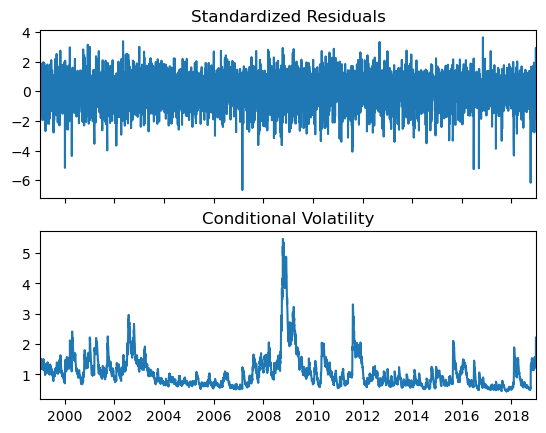

In [61]:
res.plot()

conditional volatility : 조건부 변동성


## 6. Discusssion

- 코드 한 줄 한 줄의 의미를 파악하면서 작성하는 것이 시간이 굉장히 많이 들었다. 많은 수학적 모듈과 라이브러리를 쓰기 때문에 그런 함수들의 작동하는 원리를 잘 알아야 한다고 생각했다. https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html; 공식 사이트의 가이드를 통해서 받는 변수들과 리턴, 그리고 옵션 등을 확인했다.  

- acf, pacf 자기상관과, 편자기 상관의 의미를 다시 생각해보게 되었다. lag (시간 지연)에 따라 이때까지의 영향을 다 함께 고려하는지, 비교하는 시점과의 순수한 관계를 볼 것인지의 차이가 있었다. 이것은 MA 모델에서 얼마나 이전의 시간에서의 값에 영향을 받는것인지의 p, RA 모델에서 얼마나 이전 시점과의 차이값에 관계가 있는지의 q와 각각 관계가 있고 그 차수를 정할 수 있게 된다. 

- AIC(Akaike Information Criterion) =  -2Log(Likelihood) + 2p , AIC와 BIC는 최대 likelihood 에 독립변수의 갯수에 대한 패널티를 반영시킨다. 둘다 값이 작을 수록 올바른 모형이 가깝다.
- BIC(Bayes Information Criterion) = -2Log(Likelihood) + log(n)p  



## 7. References  

- 계절성 데이터에 대한 예측 기법 (https://otexts.com/fppkr/holt-winters.html)  
- ACF, PACF로부터 MA, AR 모델의 차수구하기 ( https://direction-f.tistory.com/65)
- AIC, BIC (https://rpago.tistory.com/15) 
- likelihood (https://blog.naver.com/PostView.naver?blogId=mykepzzang&logNo=221568285099&redirect=Dlog&widgetTypeCall=true&directAccess=false)